# Starting of the tracking clouds

Define clouds, basic tools

ISSUES:

  * **links** if cells are in a frontier betweem more than 2 nodes, it could be that there is no pass between two nodes, due that a cells in the frontier is only associated with another cells of another frontier. How to solve??
  
  * **tracks** Tracks are constructed using the high-pass between orderned by energy nodes. Is the criteria of high-pass the best? can not be the fom related with the difference of the energy of the *cell* of the node and the link? for example: $\sum e_{li}/e_i$, $e_i$ energy of the cells of the node $i$, and $e_li$ the energy of the cell of the link?
  
TODO:

  * tracks
  
      * no-loop (make it as option)
  

### Nov 2020, JAH

In [146]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [147]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

In [148]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

import bes.bes           as bes
import bes.chits         as chits
import bes.display       as nplay
import clouds            as clouds
import pltclouds         as pltclouds

In [149]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed Dec  9 17:27:46 2020


### load data

In [188]:
def get_chits_filename(run_number, label = 'ph_rough'):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/chits_{label}_{run_number}.h5'
    return filename


In [314]:
fname = get_chits_filename(8183)
print(fname)
ddh    = pd.read_hdf(fname, 'CHITs.lowTh')
dde    = ddh.groupby('event')
events = np.unique(ddh.event.values)
print('total events ', len(events))

/home/hernando/data/NEW/chits_ph_rough_8183.h5
total events  211


In [315]:
ddh

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,4940,1.602689e+09,0,-67.798640,79.255091,1,-65.0,75.0,0.0,0.0,507.238185,6.490476,386.246042,-1.0,0.001568,-1,-1.0
1,4940,1.602689e+09,0,-67.798640,79.255091,1,-65.0,85.0,0.0,0.0,509.017128,18.941416,720.748478,-1.0,0.002949,-1,-1.0
2,4940,1.602689e+09,0,-67.798640,79.255091,1,-65.0,75.0,0.0,0.0,509.017128,16.789413,638.861653,-1.0,0.002594,-1,-1.0
3,4940,1.602689e+09,0,-67.798640,79.255091,1,-75.0,75.0,0.0,0.0,509.017128,8.305985,316.054852,-1.0,0.001296,-1,-1.0
4,4940,1.602689e+09,0,-67.798640,79.255091,1,-55.0,85.0,0.0,0.0,509.017128,8.232602,313.262510,-1.0,0.001263,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194539,2535875,1.602771e+09,0,-13.728725,100.427425,1,-25.0,185.0,0.0,0.0,228.323994,8.693327,192.750723,-1.0,0.001188,-1,-1.0
194540,2535875,1.602771e+09,0,-13.728725,100.427425,1,-35.0,155.0,0.0,0.0,228.323994,7.676704,170.209902,-1.0,0.000825,-1,-1.0
194541,2535875,1.602771e+09,0,-13.728725,100.427425,1,-25.0,165.0,0.0,0.0,230.016808,9.632191,584.213287,-1.0,0.002936,-1,-1.0
194542,2535875,1.602771e+09,0,-13.728725,100.427425,1,-35.0,175.0,0.0,0.0,230.016808,6.752675,409.564380,-1.0,0.002151,-1,-1.0


In [406]:
def draw_event(event = None):
    event = np.random.choice(events, 1)[0] if event is None else event
    print('event ', event)
    hh    = dde.get_group(event)
    x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
    #x, y, z, eraw = hits(hh, 'E')
    
    nplay.event(x, y, z, erec, alpha = 0.2, cmap = 'jet');
    #nplay.wf(x, y, z, erec, cmap = 'jet');
    #nplay.wf(x, y, z, eraw, cmap = 'jet');
    #nplay.wfcalib(x, y, z, erec, eraw, cmap = 'jet')
    

## Load Event

event  1615928


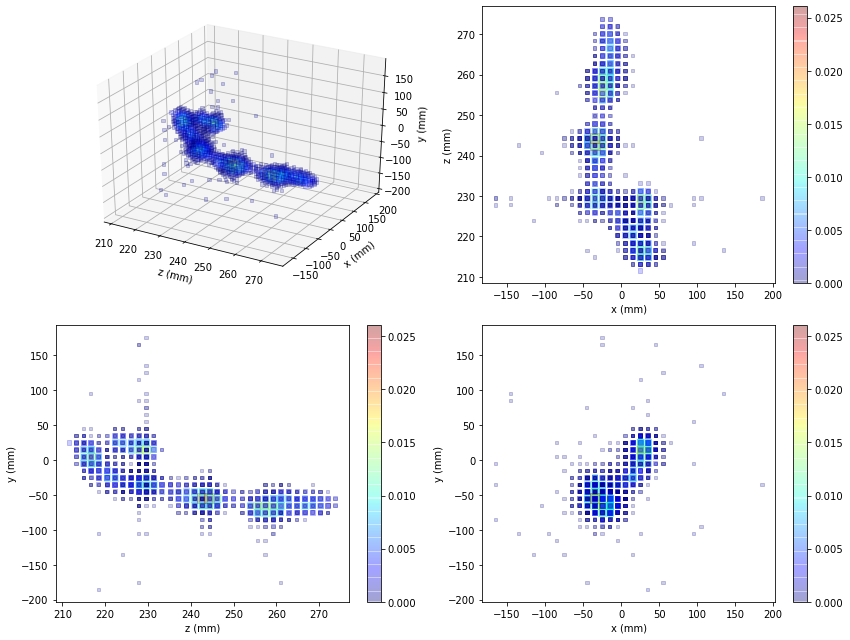

In [407]:
xevents = [1241463, 981141, 2300475, 543247]
#xevents = [1002903, 928609, 1057115, 226373]
#xevents = 1883117, 1368698, 313053, 1402289 # one-electron
#xevents = 2617619 # multiple-connections!
#xevents = 1477362 # double-electrons
xevents = np.unique(ddh.event.values)
event   = np.random.choice(xevents, 1)[0]
# event_track   = 872975, 1855276, 1402289
# event_1e      = 2266413, 2395719
# event_2e      = 856231,
# event_loops   =  285947
# event_satelites = 285627
# event_ph        = 2091409, 2186781, 2033030, 946685, 1370851
#event   = 1645993, 1807203, 756596, 39402 # A nice track
#event = 1159580
draw_event(event)

## Load the event

In [408]:
#event = 543247
hh    = dde.get_group(event)
x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
xstep, ystep, zstep = 10., 10., 2.

## Run clouds

In [409]:
ndim    = 3
coors   = (x, y, z)
steps   = (xstep, ystep, zstep)
weights = eraw # erec

dfclouds = clouds.clouds(coors, steps, weights)
#dfclouds

In [410]:
dfclouds

,x0,x1,x2,ene,kid,egrad,epath,neighbours,enode,node,sizenode,lgrad,lpath,lnode,epass,track,tnode,tpass,ranger,eranger
0,-165.0,-85.0,227.57002,131.195637,0,0.000000,0,1,131.195637,0,1,131.195637,0,0,0.0,0,0,-1,0,131.195637
1,-165.0,-35.0,229.57002,123.121069,1,0.000000,1,1,123.121069,1,1,123.121069,1,1,0.0,1,1,-1,1,123.121069
2,-165.0,-5.0,229.57002,107.891179,2,0.000000,2,1,107.891179,2,1,107.891179,2,2,0.0,2,2,-1,2,107.891179
3,-145.0,85.0,227.57002,112.982465,3,22.871273,4,2,0.000000,4,0,112.982465,3,4,0.0,4,-1,-1,-1,0.000000
4,-145.0,95.0,229.57002,135.853738,4,0.000000,4,2,248.836204,4,2,135.853738,4,4,0.0,4,4,-1,4,248.836204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,95.0,55.0,229.57002,112.504355,988,0.000000,988,1,112.504355,988,1,112.504355,988,988,0.0,988,988,-1,988,112.504355
989,105.0,-95.0,243.57002,127.223199,989,0.000000,989,1,127.223199,989,1,127.223199,989,989,0.0,989,989,-1,989,127.223199
990,105.0,135.0,229.57002,117.347438,990,0.000000,990,1,117.347438,990,1,117.347438,990,990,0.0,990,990,-1,990,117.347438
991,135.0,95.0,217.57002,134.800128,991,0.000000,991,1,134.800128,991,1,134.800128,991,991,0.0,991,991,-1,991,134.800128


## Draw clouds

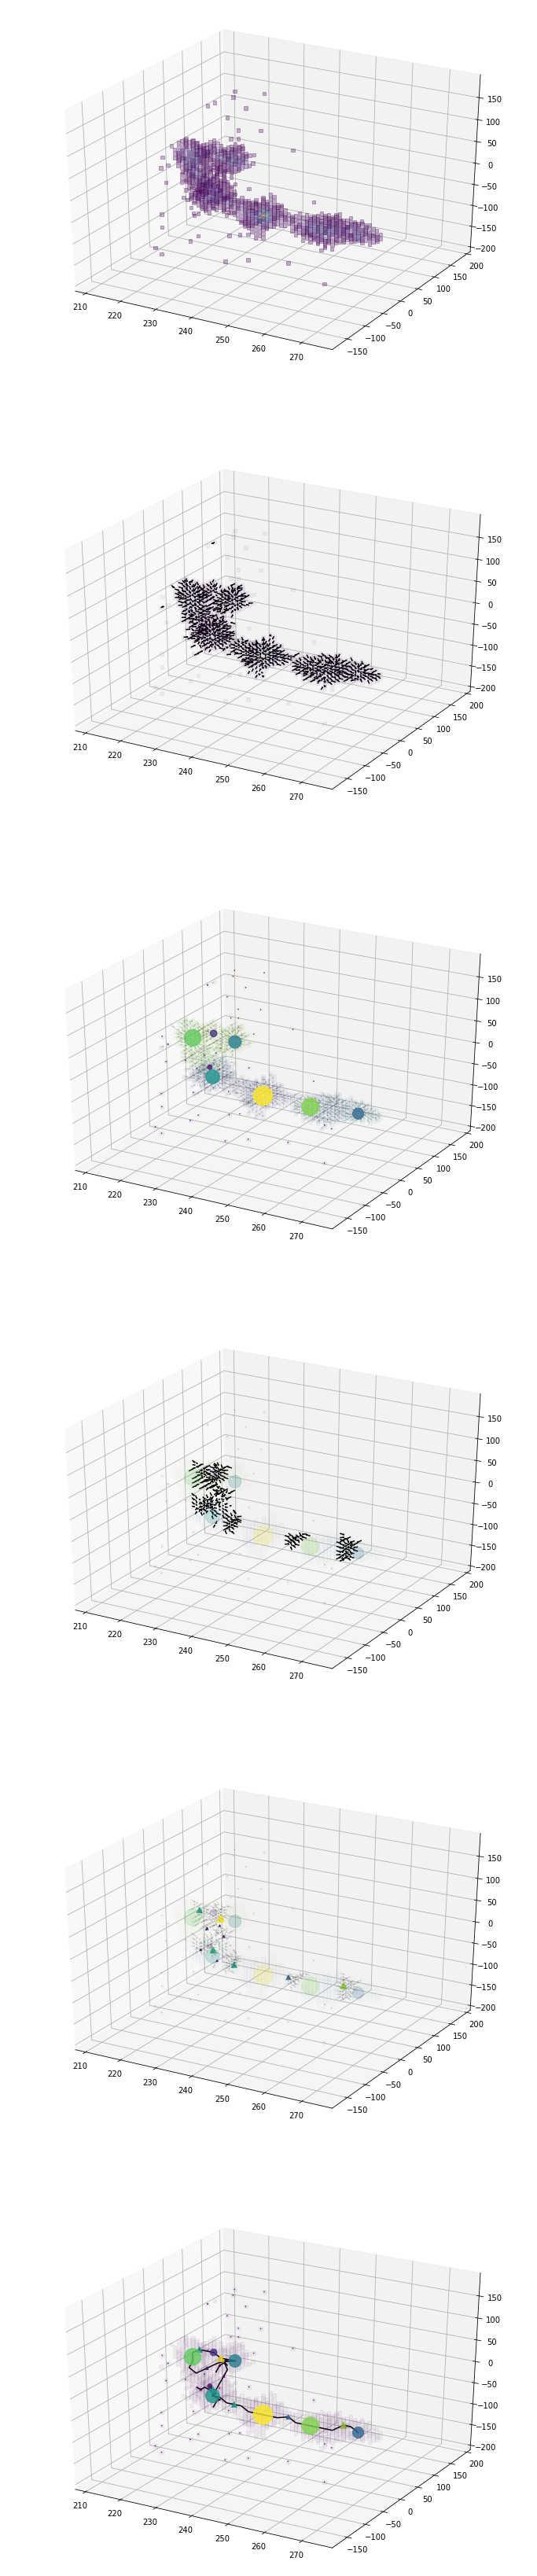

In [411]:
pltclouds.dcloud_steps(dfclouds, ndim, scale = 0.0035, xaxis = 2)

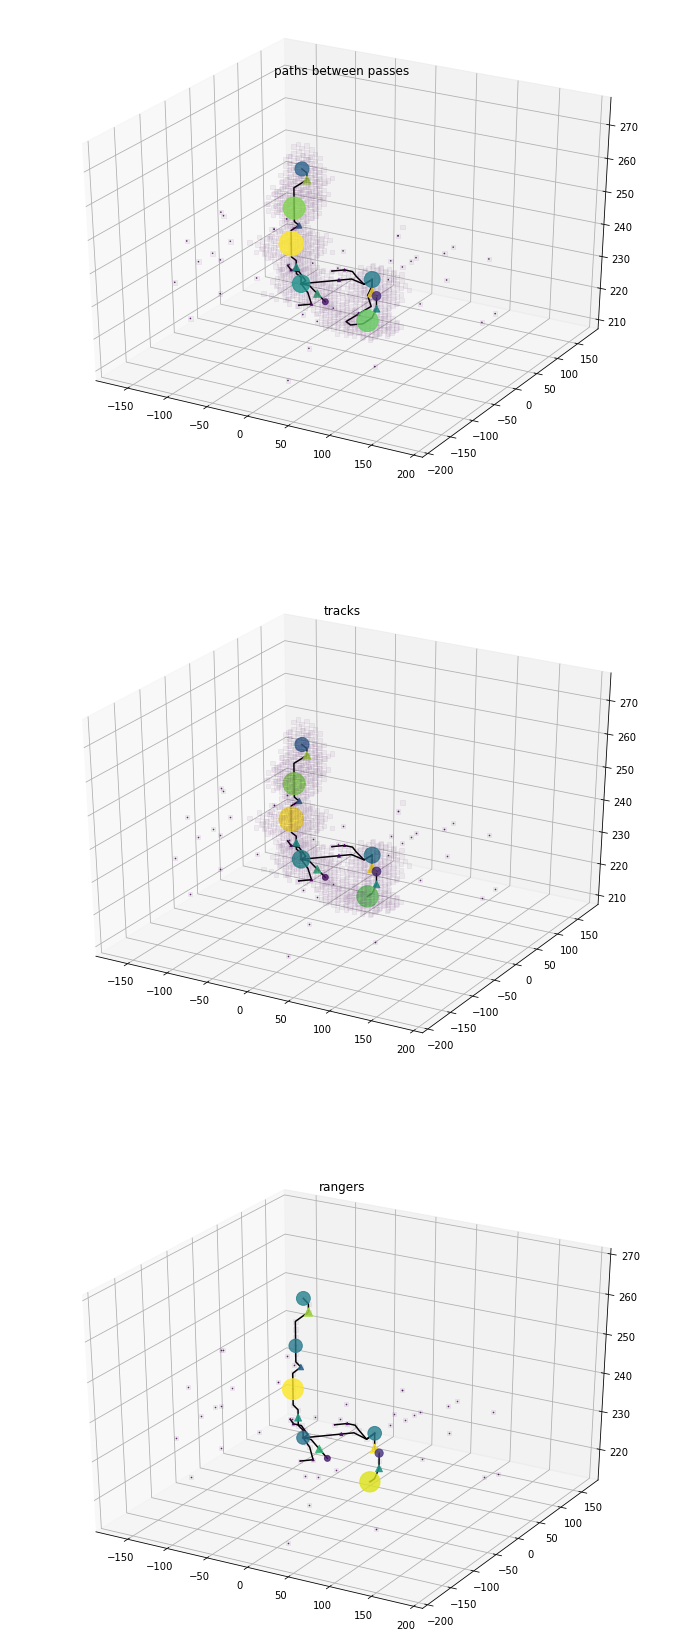

In [412]:
pltclouds.dcloud_steps_tracks(dfclouds, 3, scale = 0.0035)

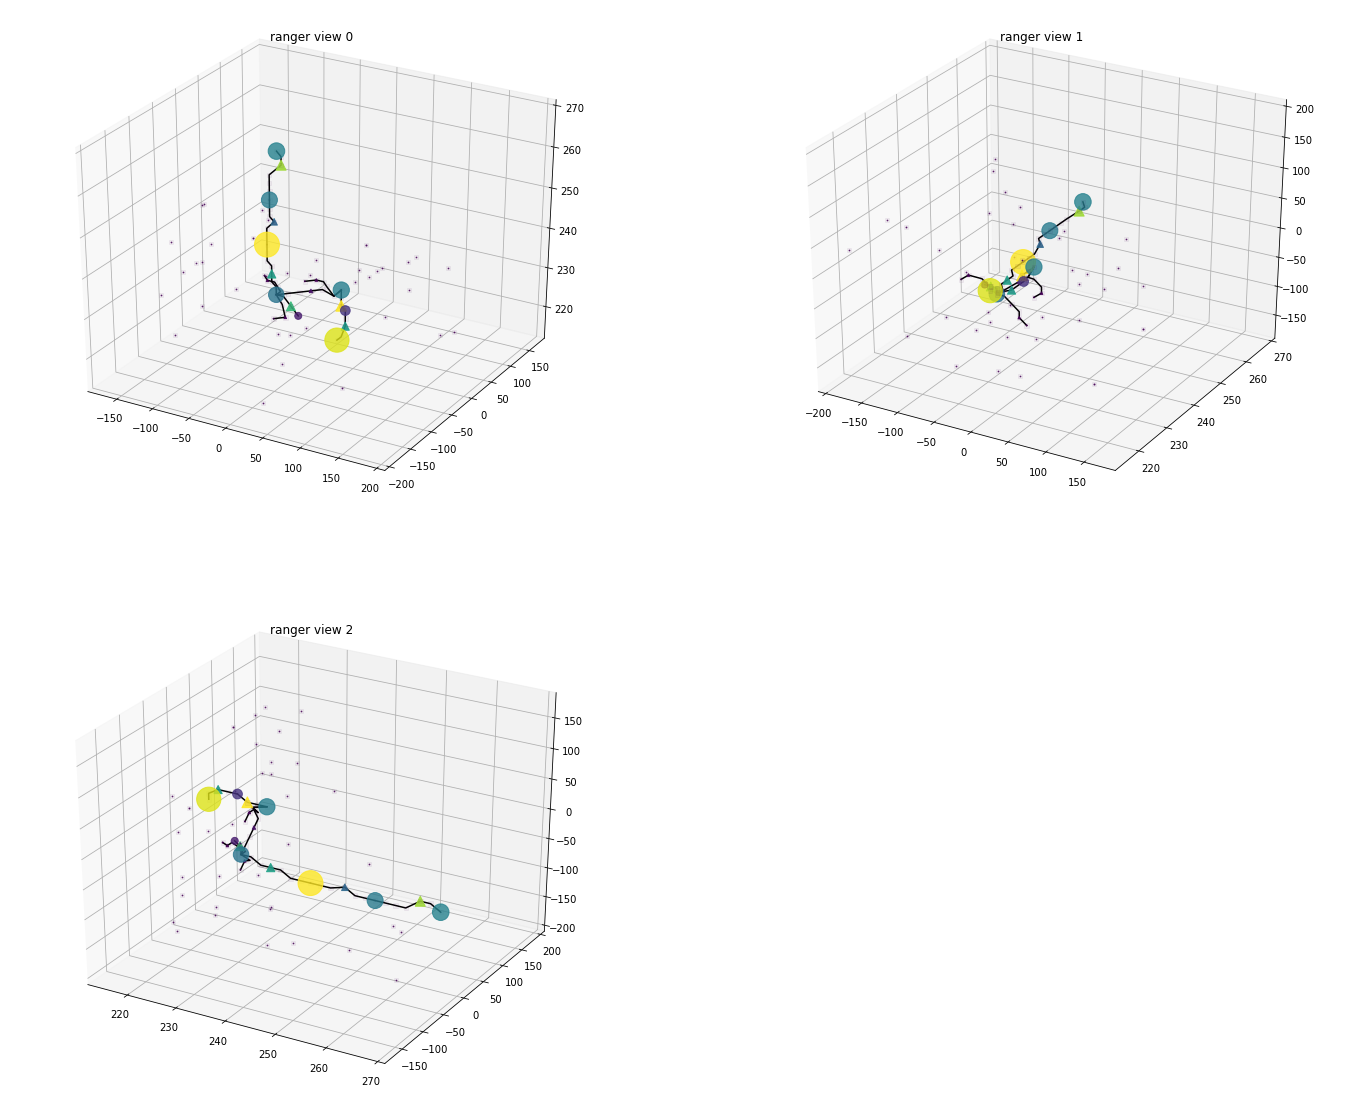

In [413]:
pltclouds.dcloud_tracks_3dviews(dfclouds, type = 'ranger', scale = 0.005, ncolumns = 2)

In [414]:
print(np.sum(dfclouds.eranger), np.sum(dfclouds.enode), np.sum(dfclouds.ene))

694836.844453454 694836.844453454 694836.844453454
